# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import sample
import math

# Import Dataset

In [2]:
dataset = pd.read_csv("/content/parkinsons_dataset.csv")

dataset.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
2933        22   57    1    47.7870       9.3743       10.324    0.00287   
3063        23   59    1     9.3958      12.2880       20.767    0.00514   
448          4   74    0    79.6670      16.0620       24.391    0.00400   
2910        21   73    0    32.8470      26.9940       38.989    0.00592   
4500        33   66    1   121.3600      27.2850       32.000    0.00888   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
2933     0.000014     0.00128      0.00130  ...        0.177       0.01050   
3063     0.000028     0.00259      0.00275  ...        0.204       0.01267   
448      0.000031     0.00146      0.00190  ...        0.363       0.02293   
2910     0.000045     0.00334      0.00313  ...        0.551       0.03484   
4500     0.000028     0.00475      0.00531  ...        0.655       0.04543   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
2933       0.01157        0.01560      0.03149  0.012796  25.939  0.40371   
3063       0.01387        0.01940      0.03801  0.019020  22.564  0.45768   
448        0.02441        0.03271      0.06878  0.015856  20.006  0.67009   
2910       0.03546        0.04596      0.10453  0.047296  18.329  0.56350   
4500       0.03715        0.04410      0.13629  0.055778  16.419  0.52122   

          DFA      PPE  
2933  0.69627  0.13137  
3063  0.73338  0.18287  
448   0.62271  0.18418  
2910  0.63907  0.19624  
4500  0.53283  0.26805  

[5 rows x 22 columns]

# Split Dataset in 80/20

In [3]:
seed = 42
df = dataset.sample(frac=1, random_state=seed)  # Shuffle the rows
train_size = int(0.8 * len(df))

train_set = df[:train_size]
test_set = df[train_size:]

# Look at Train dataset

In [4]:
train_set.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
1034         7   72    0   140.2700       15.153       21.583    0.00504   
3857        28   74    1    62.3210       31.315       37.891    0.00555   
1590        11   55    0     7.6069       17.466       19.621    0.00297   
2862        21   73    0   144.8300       32.646       43.123    0.00546   
4133        30   49    0    81.3080       26.382       37.436    0.00426   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
1034     0.000047     0.00229      0.00318  ...        0.362       0.02100   
3857     0.000029     0.00308      0.00279  ...        0.242       0.01206   
1590     0.000019     0.00137      0.00153  ...        0.205       0.00971   
2862     0.000047     0.00275      0.00315  ...        0.273       0.01703   
4133     0.000044     0.00149      0.00206  ...        0.173       0.00763   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
1034       0.02167        0.03175      0.06301  0.017045  22.260  0.52897   
3857       0.01353        0.02368      0.03617  0.010950  20.375  0.63536   
1590       0.01245        0.02128      0.02913  0.010088  24.282  0.51837   
2862       0.01830        0.02947      0.05109  0.019149  19.080  0.47216   
4133       0.00983        0.01617      0.02288  0.016896  20.219  0.68839   

          DFA      PPE  
1034  0.59057  0.20725  
3857  0.70375  0.16558  
1590  0.58656  0.14506  
2862  0.64959  0.25239  
4133  0.71663  0.17259  

[5 rows x 22 columns]

In [5]:
print(train_set.shape)

(4700, 22)


# Look at Test dataset

In [6]:
test_set.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
4493        33   66    1     58.417       25.032       29.540    0.00800   
3512        26   49    0    108.880       25.921       33.202    0.00772   
2896        21   73    0     81.803       25.496       35.992    0.00742   
5539        40   85    1     28.708       15.946       26.631    0.00474   
1865        14   58    1     76.381       11.875       16.715    0.00367   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
4493     0.000034     0.00320      0.00339  ...        0.588       0.03176   
3512     0.000066     0.00372      0.00422  ...        0.989       0.05204   
2896     0.000058     0.00355      0.00426  ...        0.511       0.02835   
5539     0.000041     0.00206      0.00254  ...        0.327       0.01948   
1865     0.000020     0.00179      0.00212  ...        0.085       0.00433   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
4493       0.03441        0.04715      0.09529  0.051726  16.200  0.55883   
3512       0.06435        0.08012      0.15612  0.062981  16.327  0.65459   
2896       0.03141        0.03826      0.08504  0.050193  17.295  0.67526   
5539       0.02311        0.03243      0.05844  0.034540  18.957  0.56202   
1865       0.00541        0.00800      0.01300  0.009875  25.095  0.33836   

          DFA      PPE  
4493  0.55575  0.32881  
3512  0.72774  0.38150  
2896  0.60349  0.24917  
5539  0.57419  0.24115  
1865  0.65258  0.21505  

[5 rows x 22 columns]

In [7]:
print(test_set.shape)

(1175, 22)


# Problem 1 - Univeriable Linear Regresion

**Feature** - PPE

**Target** - Motor_UDRS



In [8]:
train_x = train_set['PPE']
train_y = train_set['motor_UPDRS']

test_x = test_set['PPE']
test_y = test_set['motor_UPDRS']

## Look at the data

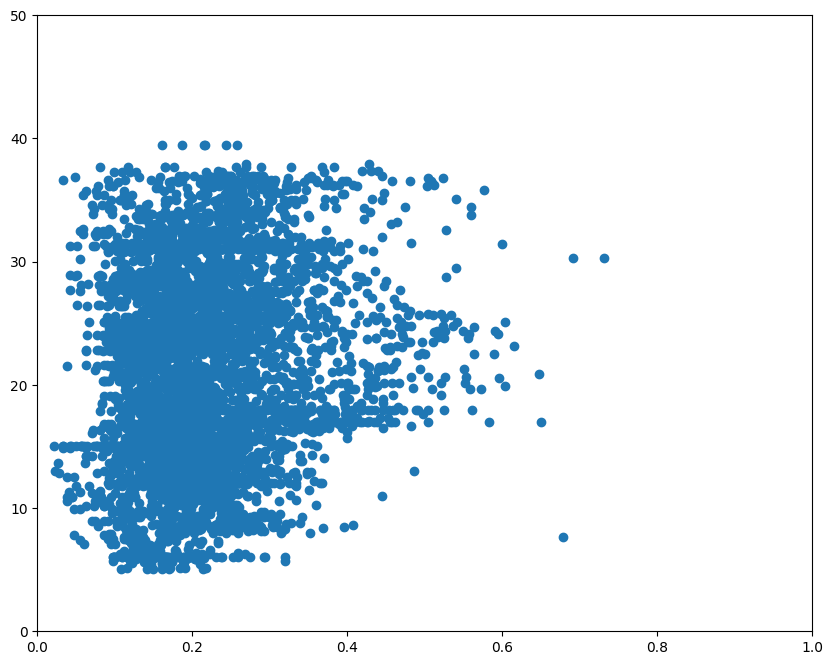

In [9]:
plt.figure(figsize=(10,8))
plt.xlim(0,1)
plt.ylim(0,50)
plt.scatter(train_x,train_y)
plt.show()

# Implement Linear Regression

Implement Linear Regression Class.
It takes the following parameters as input -

**training_x** : Training Dataset Features

**training_y** : Target Dataset Target

**test_x** : Test Dataset Features

**test_y** : Test Dataset Target

**learning_rate** : Learning Rate

**epoch**: Iteration


In [10]:
class Linear_Regression:

  def MSE(self):
    try:
      f = self.W.shape[1]
    except:
      f = 1

    if(f == 1):
      return np.sum( ((((self.W*test_x) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

    else:
      print("MSE for all", len(self.W[0]) ,"features")
      return np.sum( ((((  np.dot(self.test_x , self.W[0] )) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

  # Model ~~ (trian_x, train_y, test_x, test_y, learning_rate, Epoch)
  def __init__(self, training_x, training_y, test_x, test_y, learning_rate, epoch):
    self.training_x = training_x
    self.training_y = training_y
    self.test_x = test_x
    self.test_y = test_y
    self.learning_rate = np.float128(learning_rate)
    self.epoch = epoch
    self.costlog = []

    try:
        n = training_x.shape[1]
    except IndexError:
      n=1
    except:
      print("Considering n = 1")

    m = training_x.shape[0]
    print('Rows: ', n, 'Cols', m)

    # Set a default bias
    b = 0

    # Generate Random Weights
    if n == 1:
      W = np.array([10])
    else:
      W = np.random.randn(1, n)

    for each in range(0,self.epoch):
      # Fwd_prop: find y_hat
      Y_hat = np.float128(np.dot(self.training_x, W[0]) + b)

      # Find cost: calculate error bwt predicted and actual, consi keeping
      #            log for plotting loss
      j = np.sum(((Y_hat - np.array(train_y,dtype=np.float128))**2.0)) / ( 2.0*m)
      self.costlog.append([each, j])

      # Back_prop: Find the derivatives of change in Weights and Bias
      d_Y_hat = ((1.0/n) * (Y_hat - np.array(self.training_y, dtype=np.float128)))
      d_W = np.dot(d_Y_hat, self.training_x)
      d_b = np.sum(d_Y_hat, dtype=np.float128)

      # Update: Update weights and biases
      W = W - (learning_rate * d_W)
      b = b - (learning_rate * d_b)
      self.W = W
      self.b = b

# Visualize on Test Data

This is a function that takes our Linear Regression object as input and make a scatter plot with each regression line for each feature, in one subplot.

In [11]:
def plot_Linear_Regression(LR_Object: Linear_Regression, n=None):
  if(n == None):
    try:
      total_plot = LR_Object.W[0].shape[0]

    except:
      total_plot = 1

  else:
    total_plot = n

  print(total_plot)

  if(total_plot == 1):
    plt.scatter(LR_Object.test_x , LR_Object.test_y)
    plt.plot(LR_Object.test_x, LR_Object.test_x*LR_Object.W + LR_Object.b, "red")

  elif(total_plot == 2):
    print(LR_Object)
    plt.subplots_adjust(hspace=5, wspace=1)
    fig, axes = plt.subplots(int(total_plot/2), 2, figsize=(9, 5))

    for i, feature in enumerate(LR_Object.test_x.columns):
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y= LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i%2])

  else:
    plt.subplots_adjust(hspace=20, wspace=5)
    fig, axes = plt.subplots(math.ceil(total_plot/2), 2, figsize=(9, 20))

    for i, feature in enumerate(LR_Object.test_x.columns):
      print((i//2), (i%2))
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i//2, i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i//2, i%2])



# Create Model

Rows:  1 Cols 4700
Value of W =  13.942278287916511746 
Value of Bias = 18.237944083810371753
1


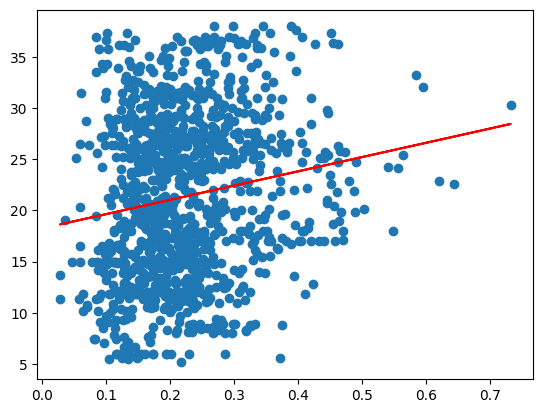

In [12]:
Linear_Model = Linear_Regression(train_x, train_y, test_x, test_y, 0.0001, 500)
print("Value of W = ", Linear_Model.W[0], "\nValue of Bias =", Linear_Model.b)
plot_Linear_Regression(Linear_Model)

# Look at cost function and Measure Error

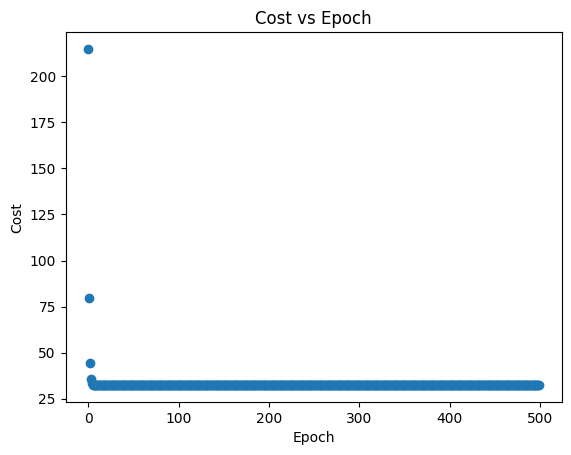

62.254365487321570362


In [13]:
cost_log = Linear_Model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(Linear_Model.MSE())

# Two Variable Linear Regression

**Feature 1:** PPE<br>
**Feature 2:** NHS

**Target:** Motor_UDRS

In [14]:
Two_feature_training_x = train_set[['PPE', "NHR"]]
Two_feature_training_y = train_set['motor_UPDRS']

Two_feature_test_x = test_set[['PPE', 'NHR']]
Two_feature_test_y = test_set['motor_UPDRS']

# Visualize the Data - PPE vs motor_UPDRS

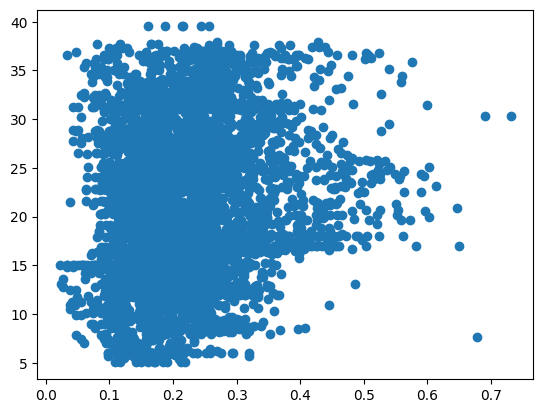

In [15]:
plt.scatter(Two_feature_training_x['PPE'], Two_feature_training_y)

# Visualize the Data - NHR vs motor_UPDRS

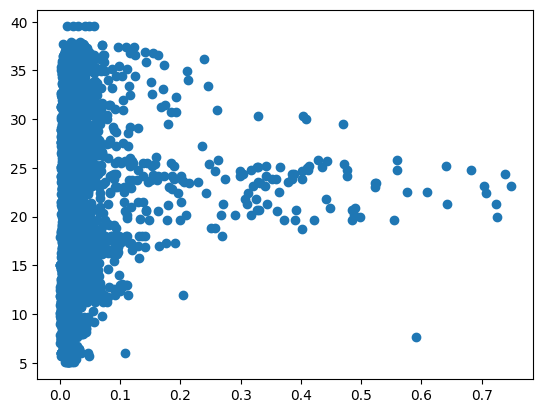

In [16]:
plt.scatter(Two_feature_training_x['NHR'], Two_feature_training_y)

# Implement Two Variable Linear Regression and Visualize - Look at the results

Rows:  2 Cols 4700
2


<Figure size 640x480 with 0 Axes>

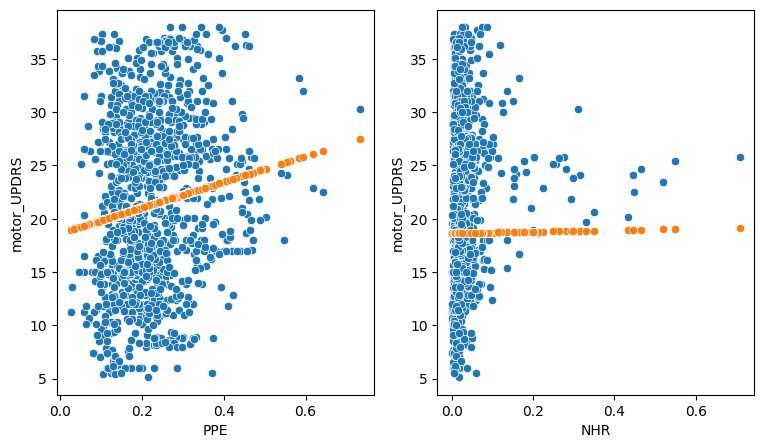

In [17]:
Two_var_Model = Linear_Regression(Two_feature_training_x, Two_feature_training_y, Two_feature_test_x, Two_feature_test_y, 0.0001, 1000)
plot_Linear_Regression(Two_var_Model, 2)

# Look at Cost Function and Measure Error

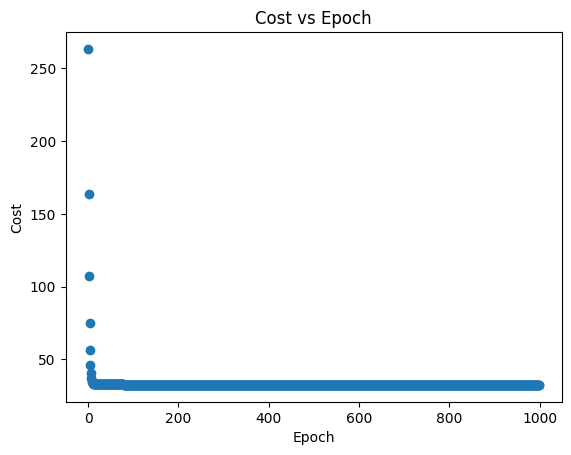

MSE for all 2 features
MES: 62.35512700167696863


In [18]:
cost_log = Two_var_Model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()

print("MES:", Two_var_Model.MSE())

# Forward Stepwise Linear Regression

Making the Dataset

In [19]:
train_set_10F_x = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
train_set_10F_y = train_set["motor_UPDRS"]

test_set_10F_x = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_set_10F_y = test_set["motor_UPDRS"]

# Data Visualization

<Figure size 640x480 with 0 Axes>

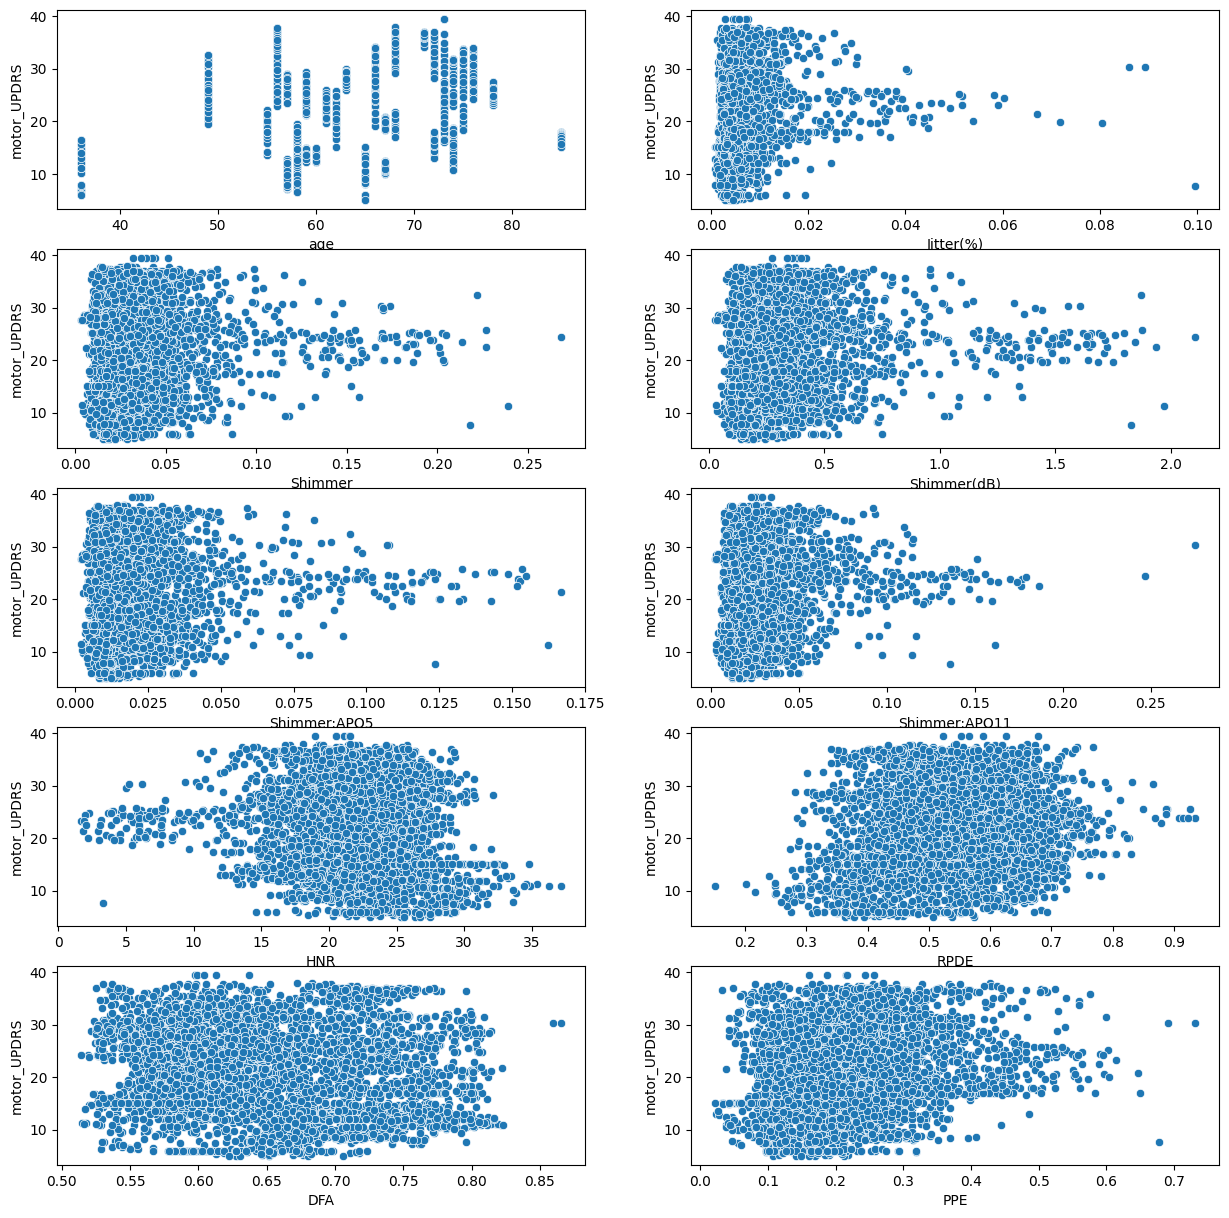

In [20]:
plt.subplots_adjust(hspace=20, wspace=1)
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
for i, feature in enumerate(train_set_10F_x.columns):
    sns.scatterplot(x=train_set_10F_x[feature], y=train_set_10F_y, ax=axes[i // 2, i % 2])

# From Visual Inspection
**RPDE** seems linear

Rows:  1 Cols 4700
1


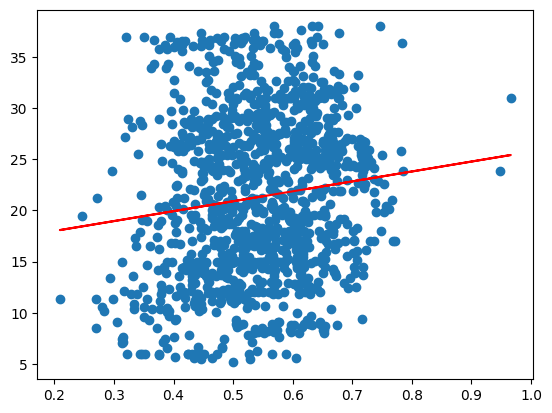

In [21]:
model_1var = Linear_Regression(train_set_10F_x['RPDE'], train_set_10F_y, test_set_10F_x['RPDE'], test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_1var)

# Cost Function and Error

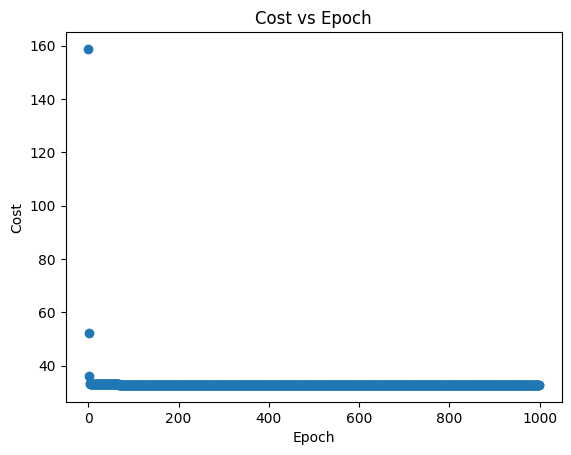

72.35854144135787294


In [22]:
cost_log = model_1var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()

print(model_1var.MSE())

# Setting 2nd Variable: PPE

Rows:  2 Cols 4700
2


<Figure size 640x480 with 0 Axes>

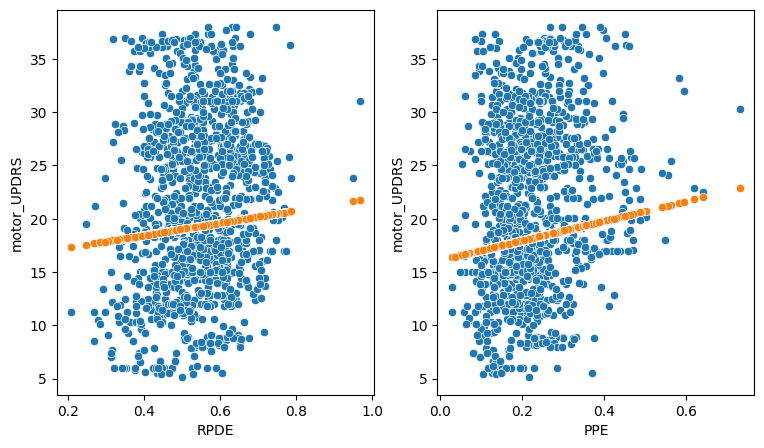

In [23]:
train_fw_sw2 = train_set[['RPDE', 'PPE']]
test_fw_sw2 = test_set[['RPDE', 'PPE']]

model_2var = Linear_Regression(train_fw_sw2, train_set_10F_y, test_fw_sw2, test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_2var)

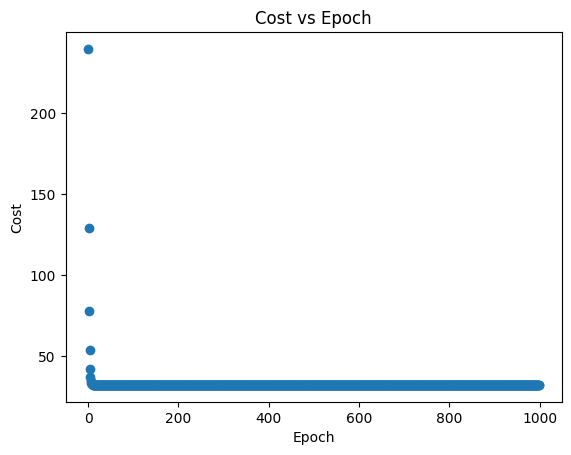

MSE for all 2 features
61.926049961709581593


In [24]:
cost_log = model_2var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_2var.MSE())

MSE Become Better!

# Adding 3rd variable - Jitter%

Rows:  3 Cols 4700
3
0 0
0 1
1 0


<Figure size 640x480 with 0 Axes>

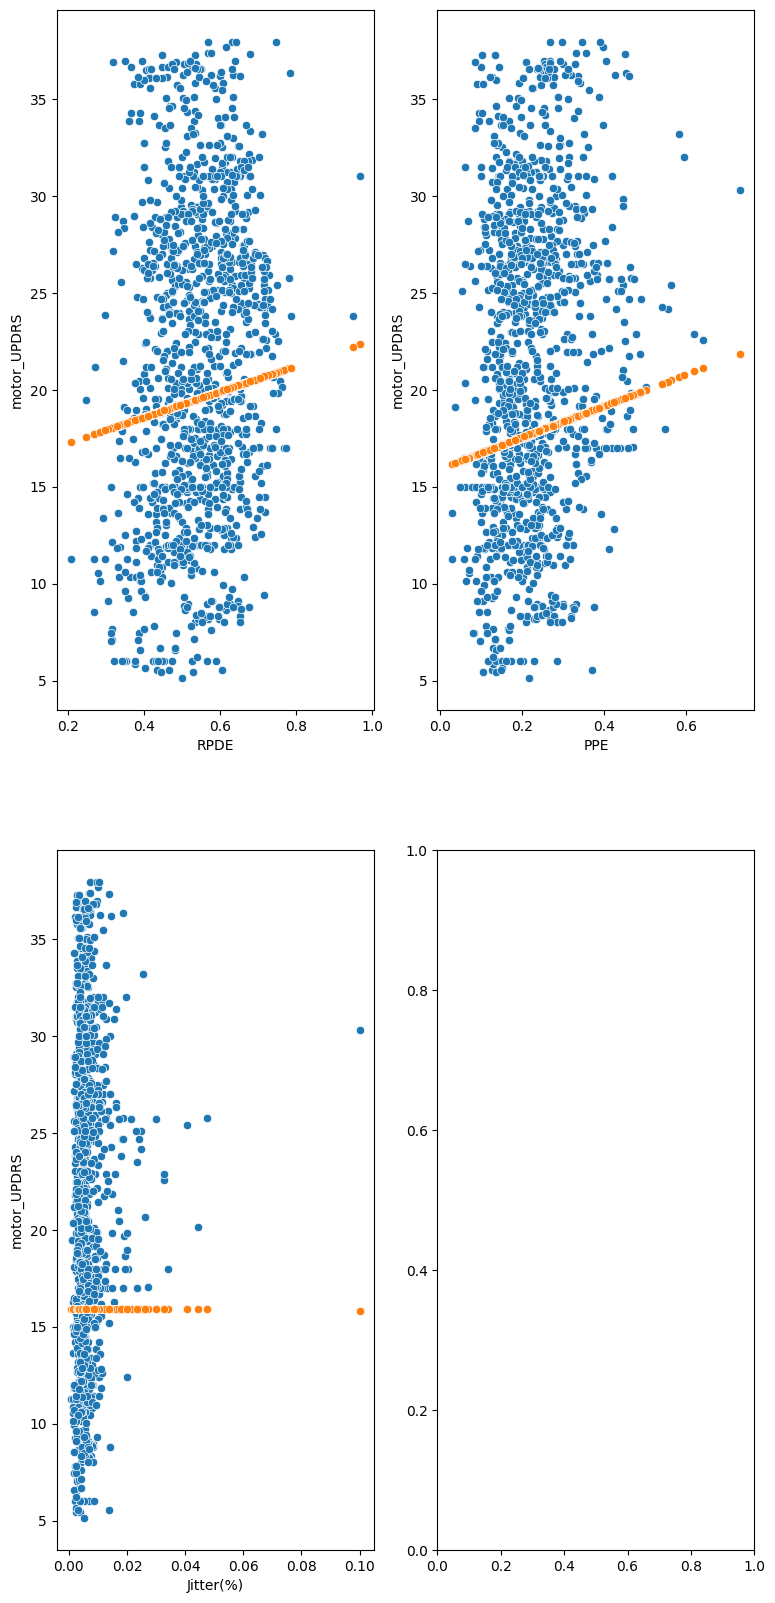

In [25]:
train_fw_sw3 = train_set[['RPDE', 'PPE', 'Jitter(%)']]
test_fw_sw3 = test_set[['RPDE', 'PPE', 'Jitter(%)']]

model_3var = Linear_Regression(train_fw_sw3, train_set_10F_y, test_fw_sw3, test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_3var)

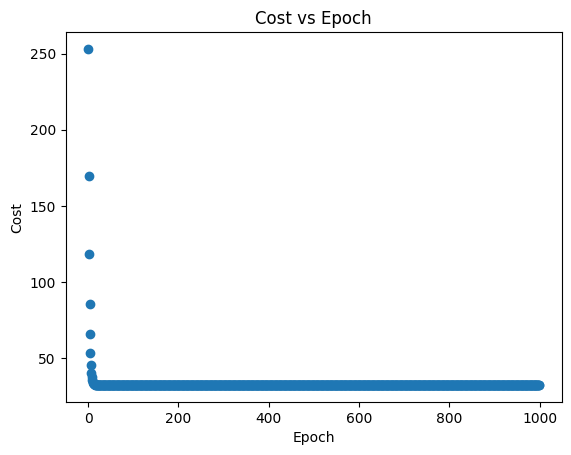

MSE for all 3 features
61.949736715372798766


In [26]:
cost_log = model_3var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_3var.MSE())

# Adding: Shimmer

Rows:  4 Cols 4700
4
0 0
0 1
1 0
1 1


<Figure size 640x480 with 0 Axes>

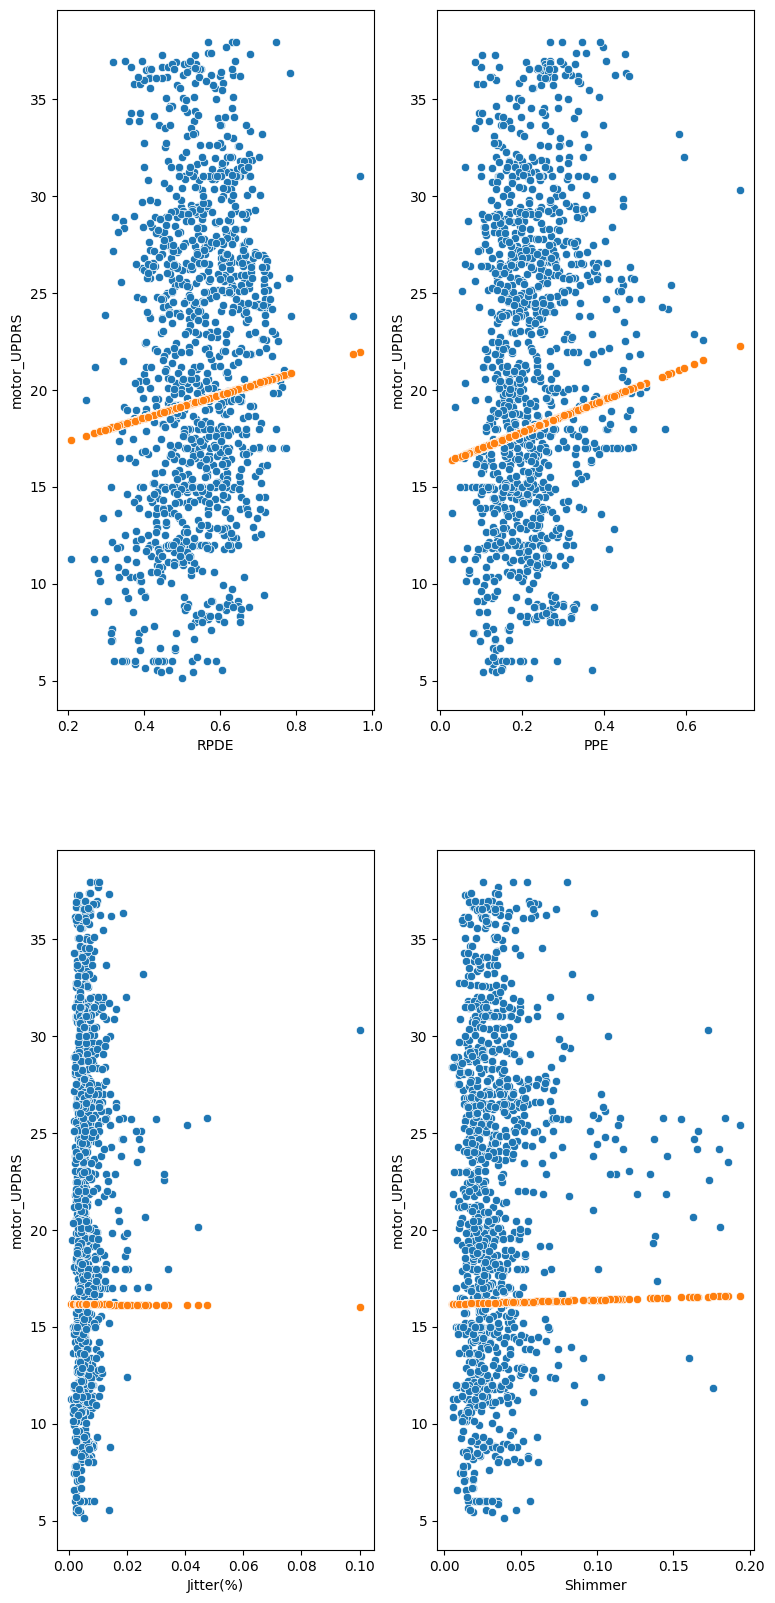

In [27]:
train_fw_sw4 = train_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer']]
test_fw_sw4 = test_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer']]

model_4var = Linear_Regression(train_fw_sw4, train_set_10F_y, test_fw_sw4, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_4var)

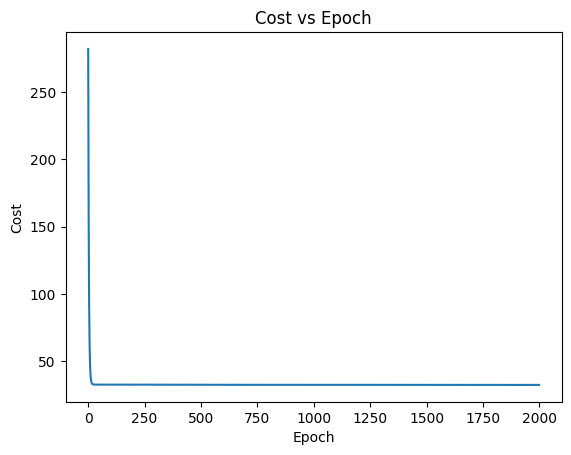

MSE for all 4 features
61.968196553788042355


In [28]:
cost_log = model_4var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_4var.MSE())

Almost same as before.

Adding a new feature


# Trying an new feature to see if anything changes - Add Shimmer:APQ5

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

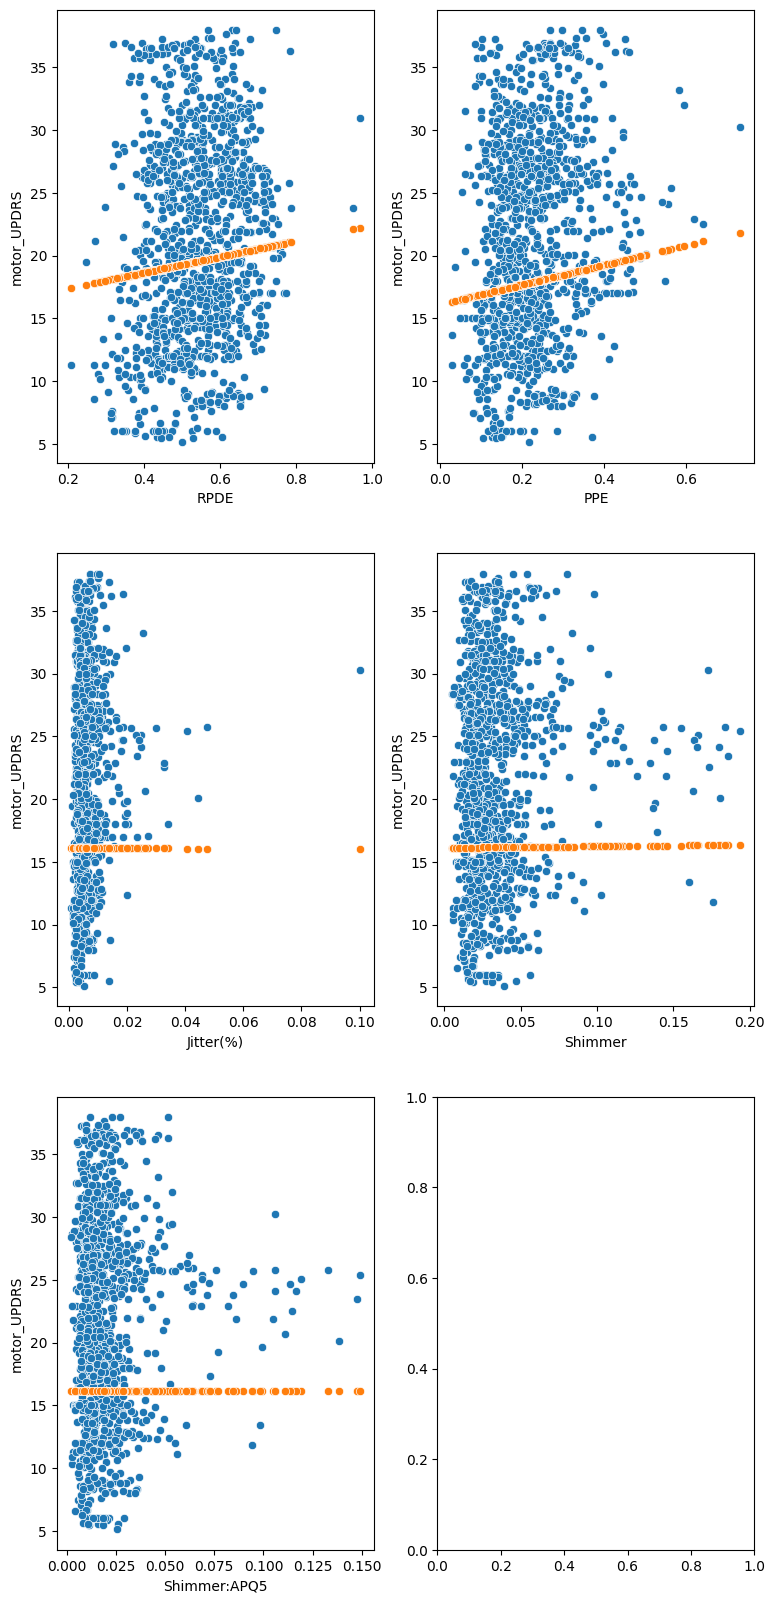

In [29]:
train_fw_sw5 = train_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer', 'Shimmer:APQ5']]
test_fw_sw5 = test_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer', 'Shimmer:APQ5']]

model_5var = Linear_Regression(train_fw_sw5, train_set_10F_y, test_fw_sw5, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_5var)

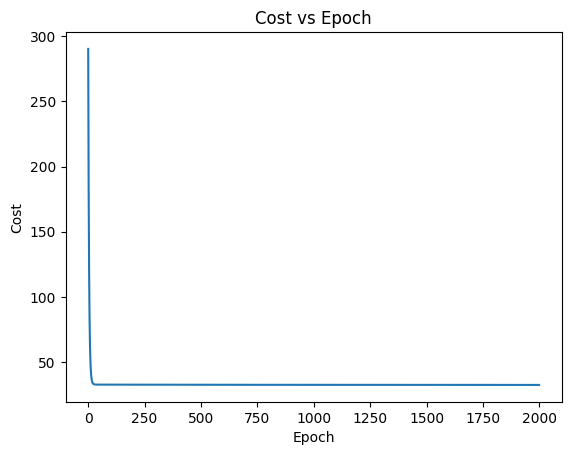

MSE for all 5 features
61.984368936362181906


In [30]:
cost_log = model_5var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_5var.MSE())

**Shimmer:APQ5** doesn't give drastically better results. So, choosing another feature.

Back to 61.9 again, but this is as good as it gets.

# Backwards Stepwise

Starting with all 10 features

Rows:  10 Cols 4700
10
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


<Figure size 640x480 with 0 Axes>

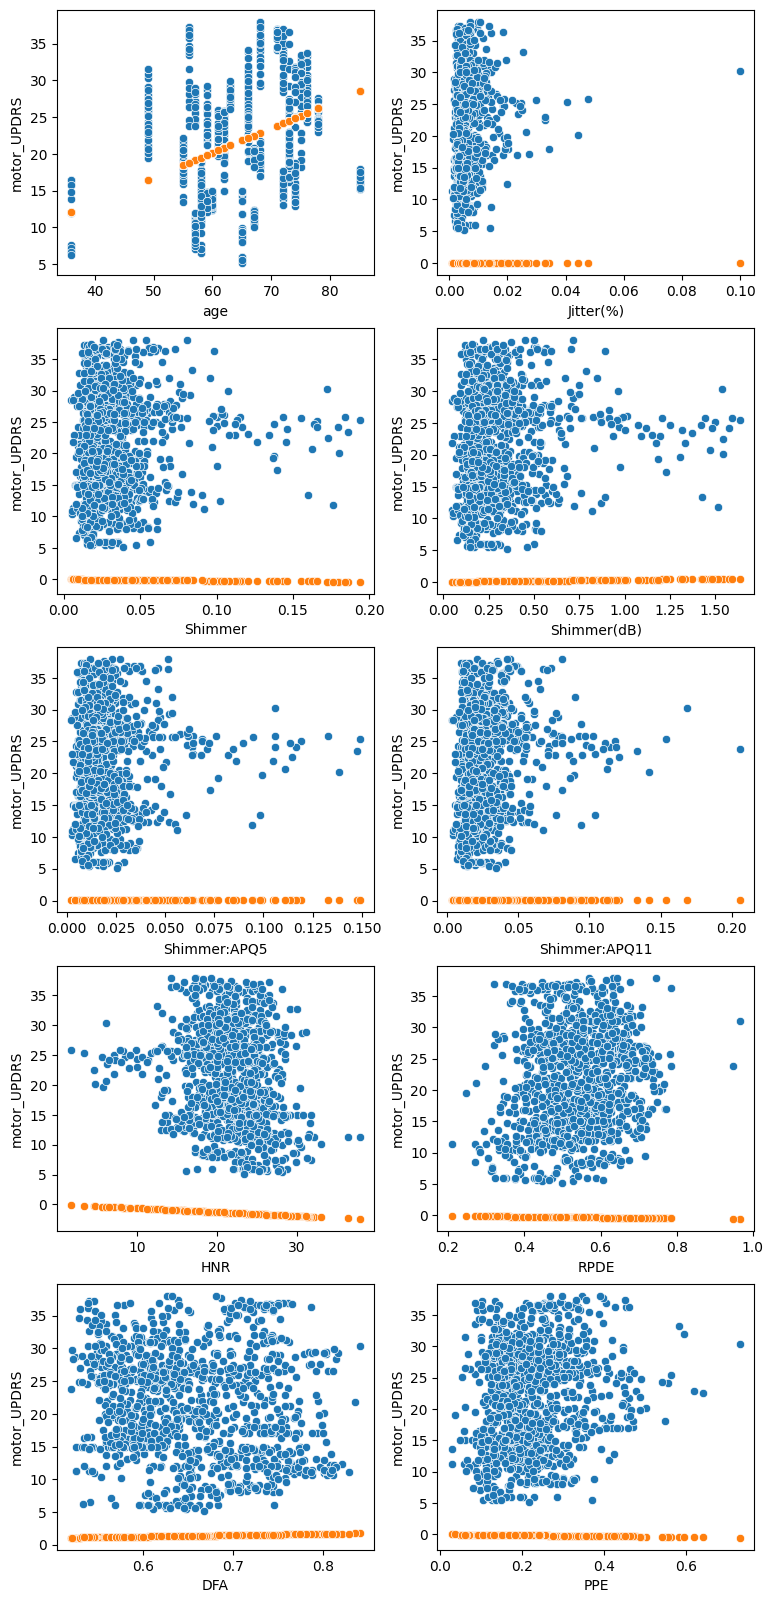

In [31]:
train_fw_sw10 = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_fw_sw10 = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

model_10var = Linear_Regression(train_fw_sw10, train_set_10F_y, test_fw_sw10, test_set_10F_y, 0.0000001, 2000)
plot_Linear_Regression(model_10var)

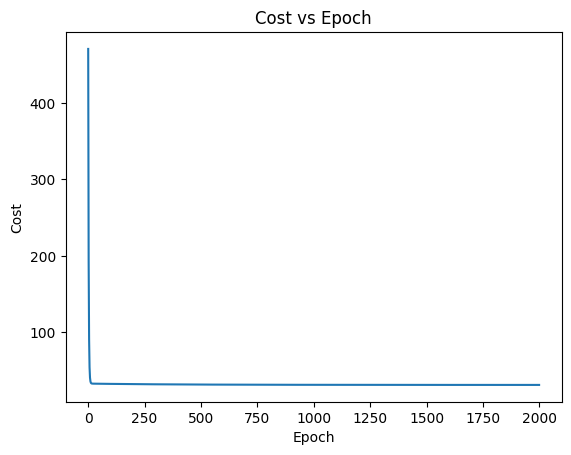

MSE for all 10 features
61.04423110396852603


In [32]:
cost_log = model_10var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_10var.MSE())

Though this gives best result but the model seems it only learned one feature and whole prediction is based on that feature / age.

# Removing Age

Rows:  9 Cols 4700
9
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0


<Figure size 640x480 with 0 Axes>

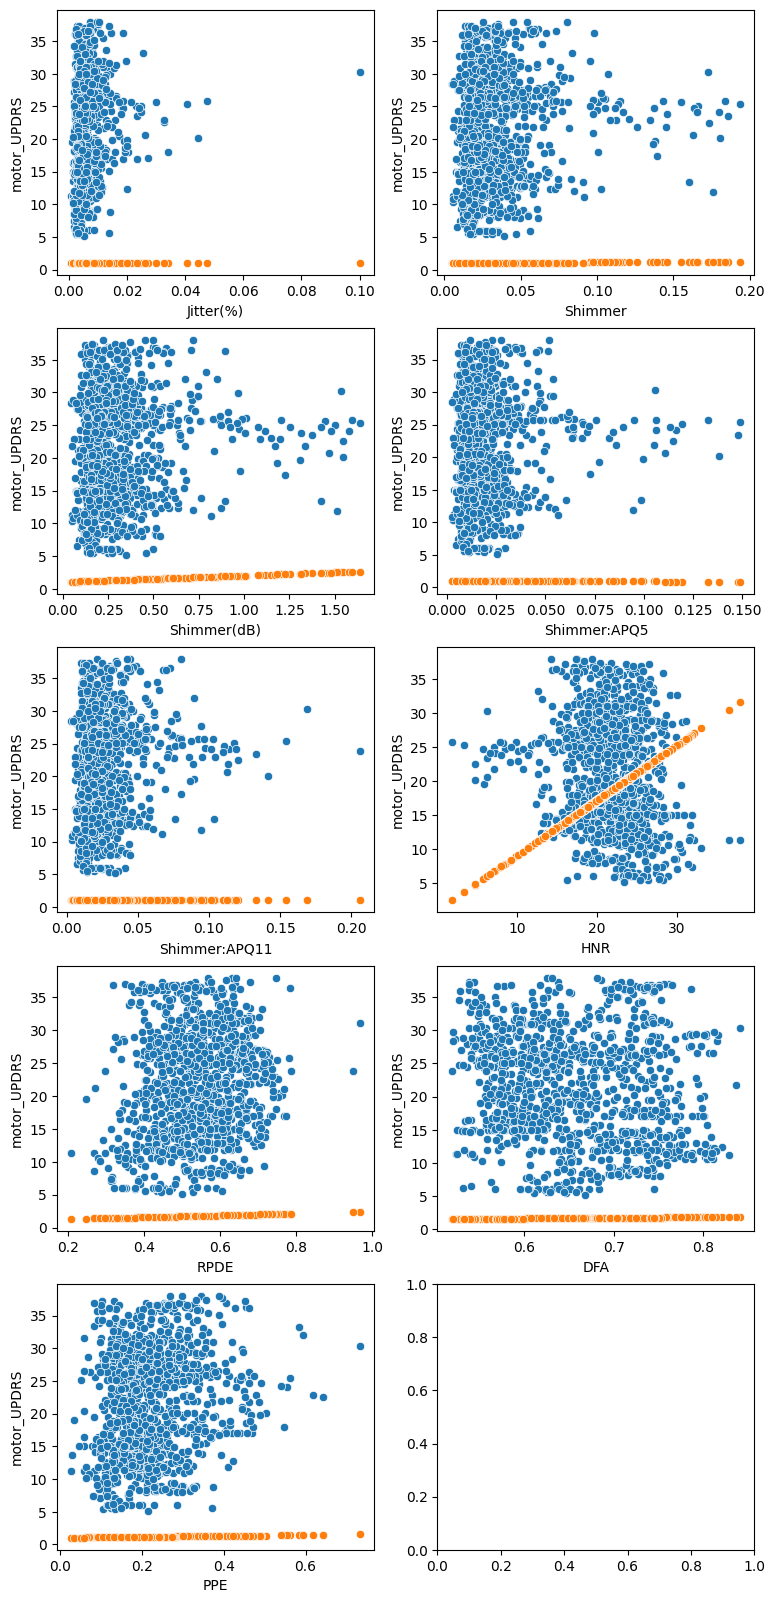

In [33]:
train_fw_sw9 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_fw_sw9 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

model_9var = Linear_Regression(train_fw_sw9, train_set_10F_y, test_fw_sw9, test_set_10F_y, 0.000001, 2000)
plot_Linear_Regression(model_9var)

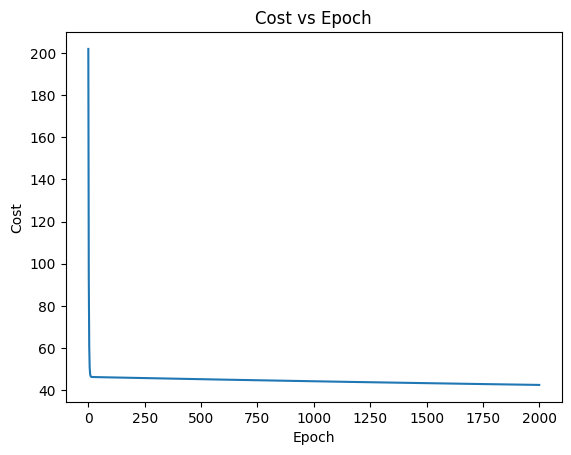

MSE for all 9 features
83.373596567079830674


In [34]:
cost_log = model_9var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_9var.MSE())

Looking at the regression lines, HNR dominates too much for which others do not seem to learn. So we need to remove HNR

# Removing HNR

Rows:  8 Cols 4700
8
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


<Figure size 640x480 with 0 Axes>

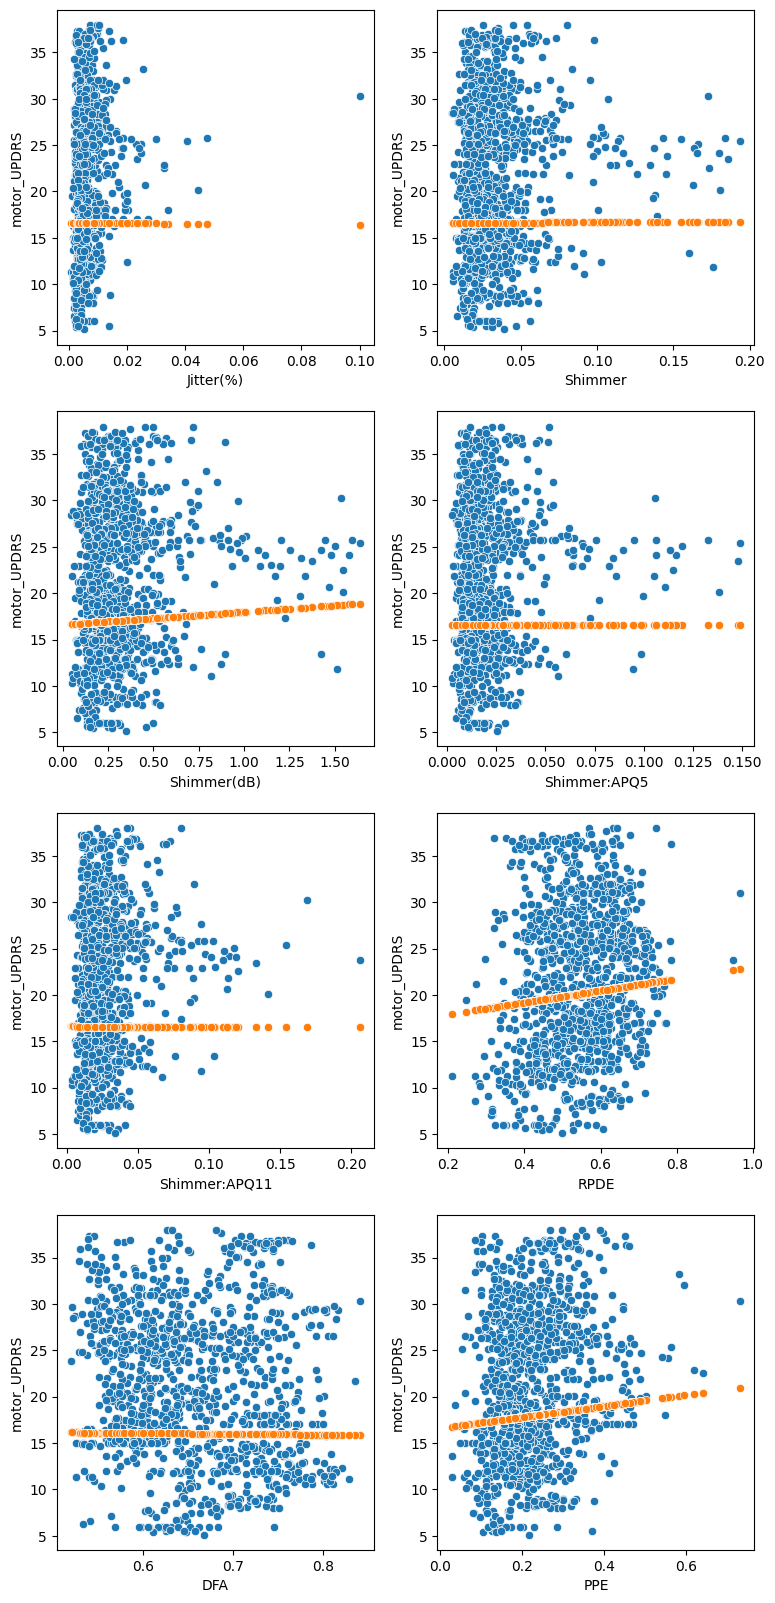

In [35]:
train_fw_sw8 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "RPDE", "DFA", "PPE"]]
test_fw_sw8 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "RPDE", "DFA", "PPE"]]

model_8var = Linear_Regression(train_fw_sw8, train_set_10F_y, test_fw_sw8, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_8var)

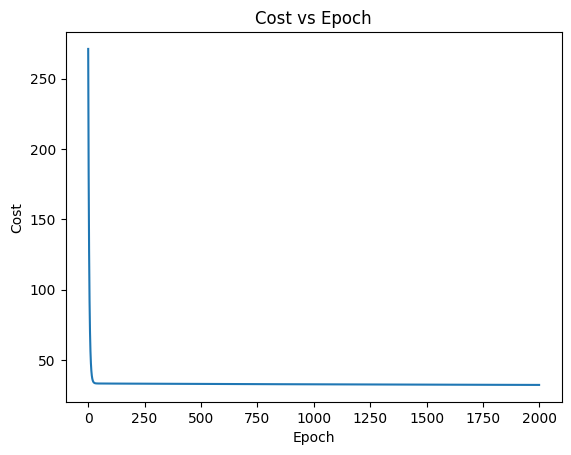

MSE for all 8 features
61.93639770984423561


In [36]:
cost_log = model_8var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_8var.MSE())

Model is performing better.

# Removing RPDE

Rows:  7 Cols 4700
7
0 0
0 1
1 0
1 1
2 0
2 1
3 0


<Figure size 640x480 with 0 Axes>

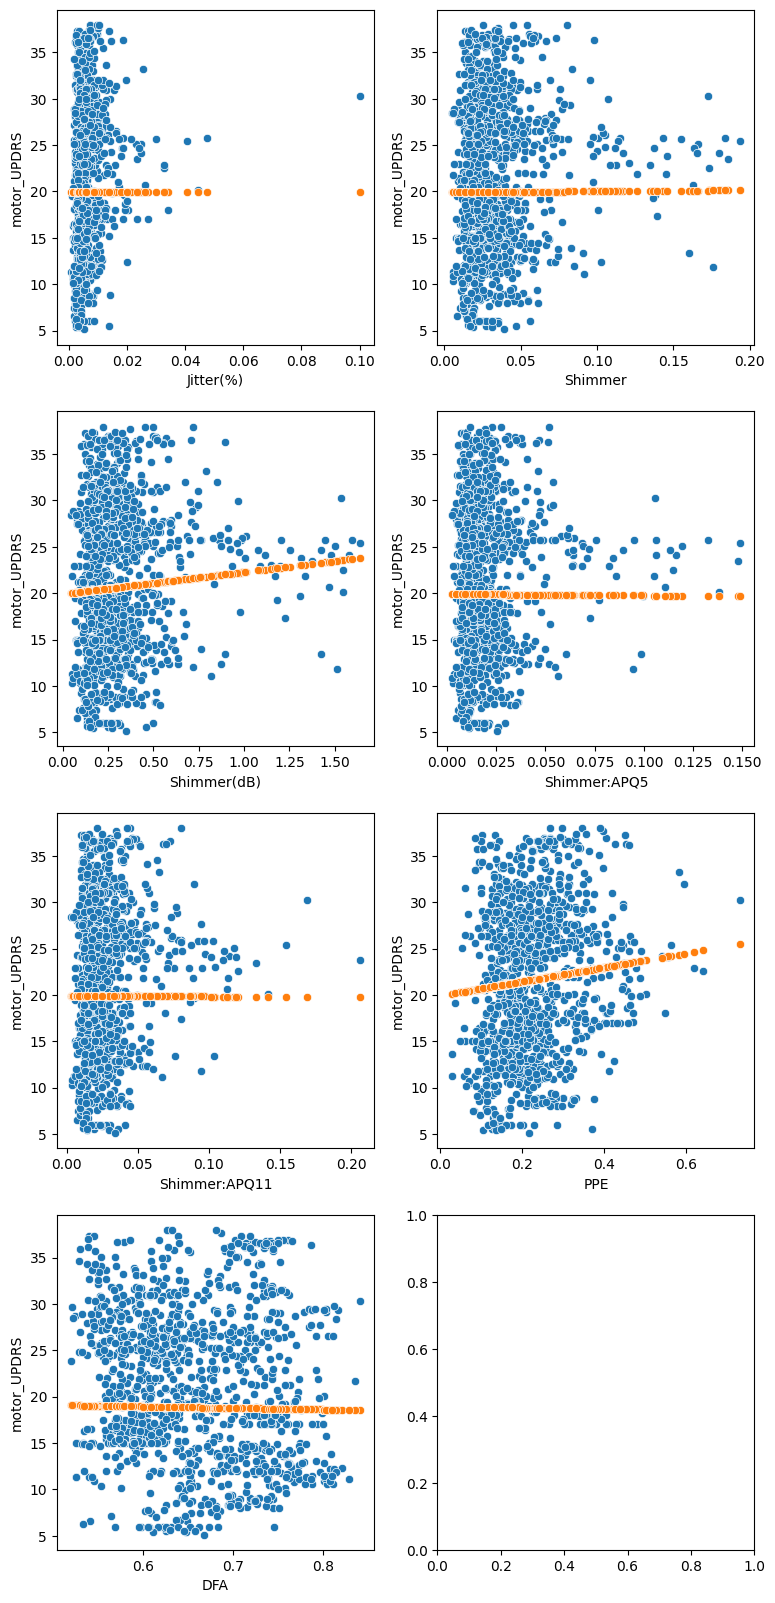

In [37]:
train_fw_sw7 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "PPE", "DFA"]]
test_fw_sw7 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "PPE", "DFA"]]

model_7var = Linear_Regression(train_fw_sw7, train_set_10F_y, test_fw_sw7, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_7var)

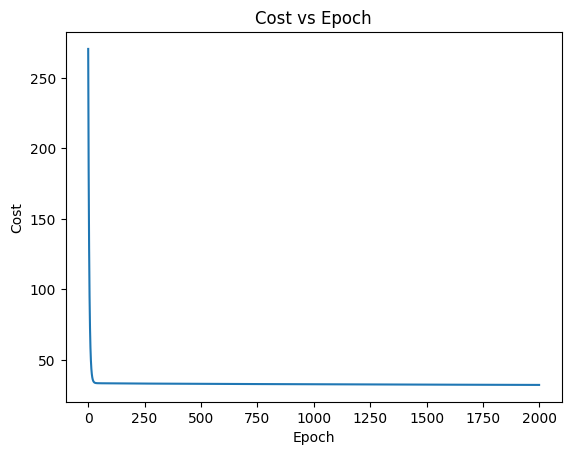

MSE for all 7 features
62.366138659921893407


In [38]:
cost_log = model_7var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_7var.MSE())

Accurecy look betters.

# Removing - Jitter
Visually, it seems to be contributing to higher error

Rows:  6 Cols 4700
6
0 0
0 1
1 0
1 1
2 0
2 1


<Figure size 640x480 with 0 Axes>

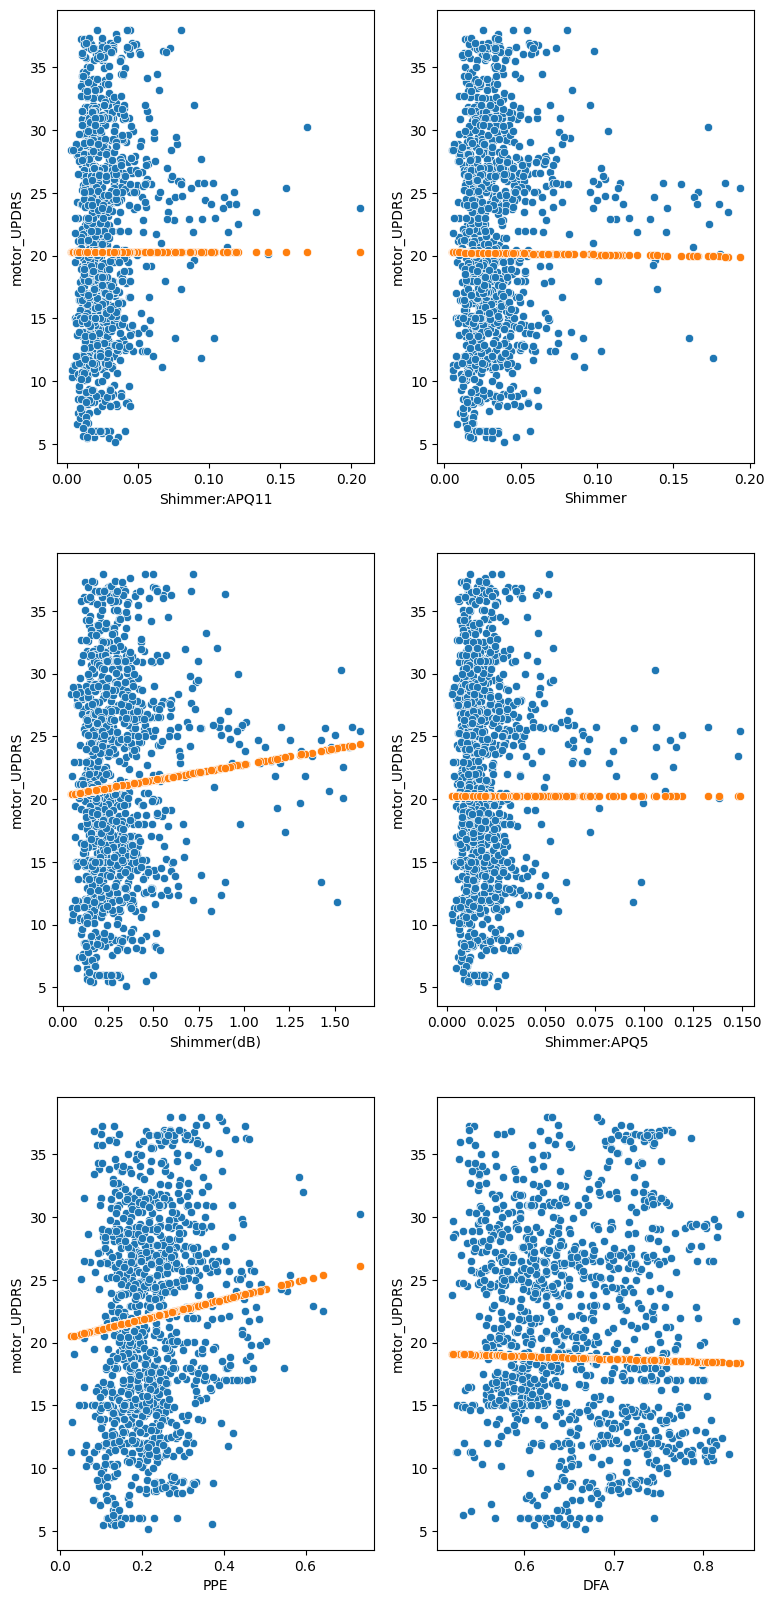

In [39]:
train_fw_sw6 = train_set[["Shimmer:APQ11", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "PPE", "DFA"]]
test_fw_sw6 = test_set[["Shimmer:APQ11", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "PPE", "DFA"]]

model_6var = Linear_Regression(train_fw_sw6, train_set_10F_y, test_fw_sw6, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_6var)

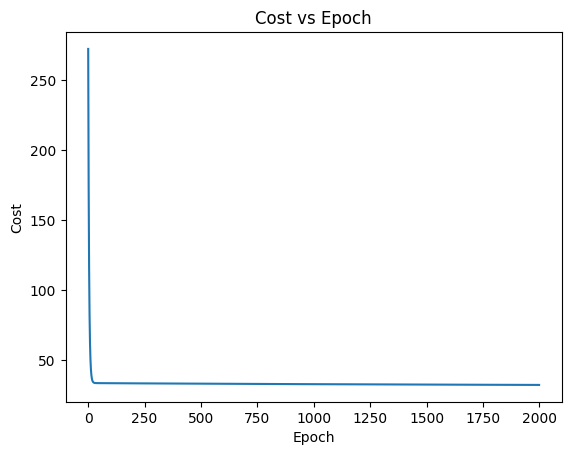

MSE for all 6 features
62.210290981708341977


In [40]:
cost_log = model_6var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_6var.MSE())

# Removing - Shimmer

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

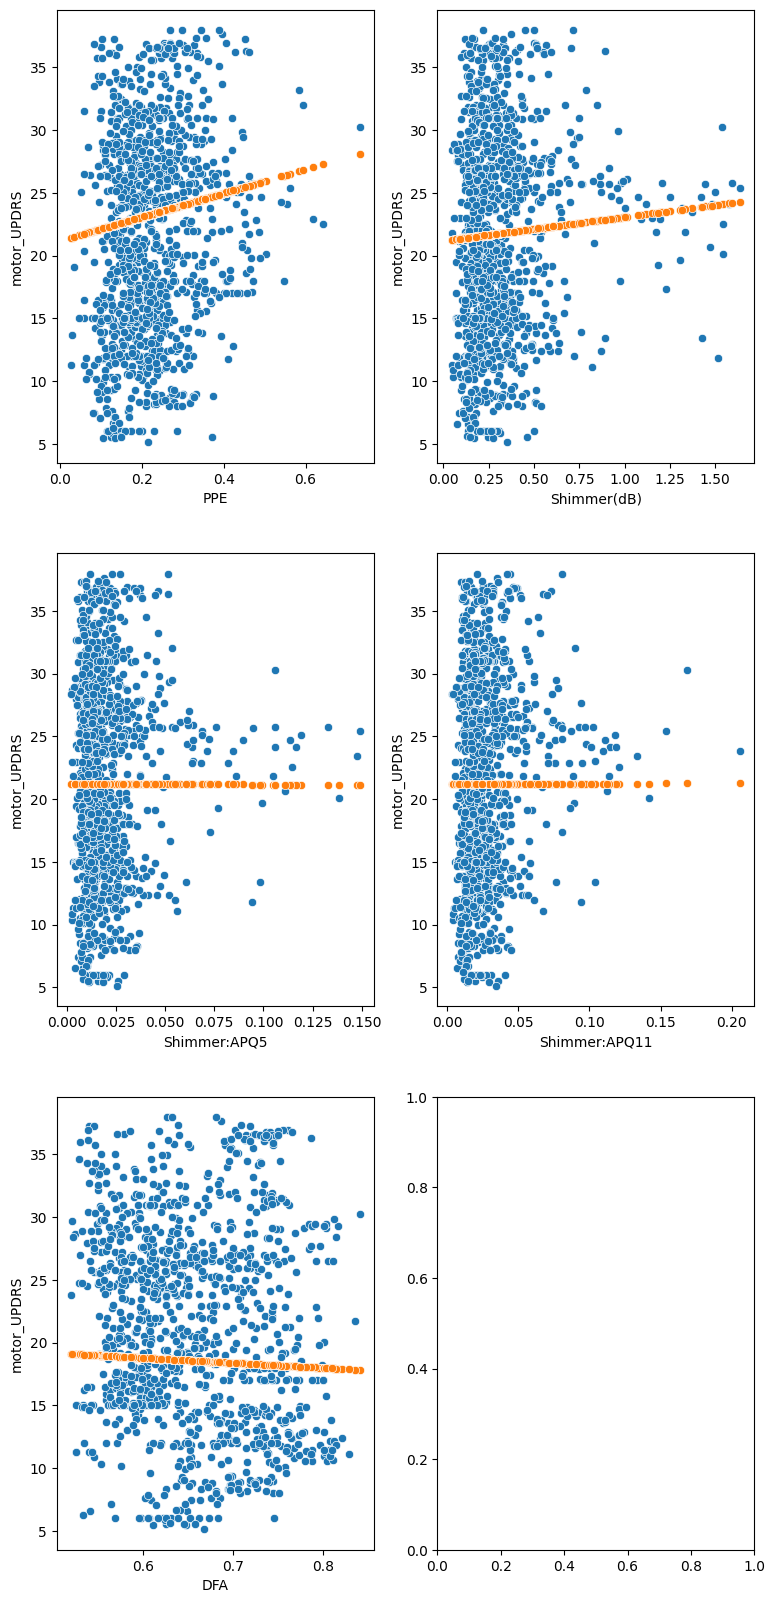

In [41]:
train_fw_sw5 = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_fw_sw5 = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

model_5var = Linear_Regression(train_fw_sw5, train_set_10F_y, test_fw_sw5, test_set_10F_y, 0.0001, 2000) # 0.0025 5k best
plot_Linear_Regression(model_5var)

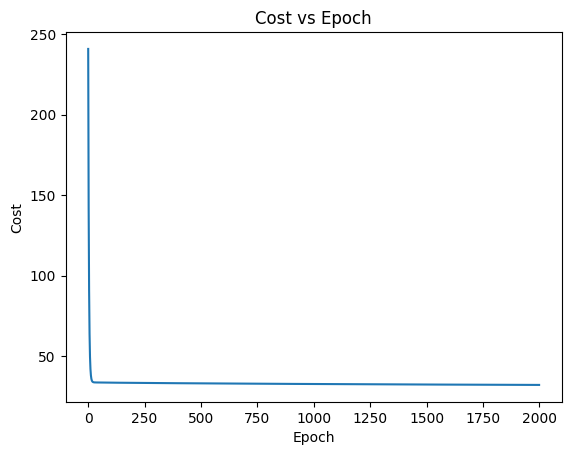

MSE for all 5 features
61.76107545290046536


In [42]:
cost_log = model_5var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_5var.MSE())

# Implementing Feature Scaling (Normalization)

In [50]:
train_Full_scale = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_Full_scale = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

train_scaled = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_scaled = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

for each in train_Full_scale.columns:
  fmin = train_Full_scale[each].min()
  fmax = train_Full_scale[each].max()
  train_scaled[each] = ((train_Full_scale[each] - fmin)/(fmax-fmin))

for each in test_Full_scale.columns:
  fmin = test_Full_scale[each].min()
  fmax = test_Full_scale[each].max()
  test_scaled[each] = ((test_Full_scale[each] - fmin)/(fmax-fmin))

<ipython-input-50-da57a6ead0aa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_scaled[each] = ((train_Full_scale[each] - fmin)/(fmax-fmin))
<ipython-input-50-da57a6ead0aa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[each] = ((test_Full_scale[each] - fmin)/(fmax-fmin))


In [51]:
train_scaled.sample(5)

PPE  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11       DFA
2620  0.354706     0.142239      0.103102       0.092538  0.629992
836   0.277261     0.109563      0.072631       0.063267  0.285897
1313  0.245917     0.063912      0.039981       0.039382  0.457561
405   0.164356     0.019702      0.018961       0.016705  0.186938
4430  0.350548     0.254685      0.190453       0.130564  0.119240

In [52]:
test_scaled.sample(5)

PPE  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11       DFA
2538  0.138343     0.127044      0.092634       0.079003  0.330157
2563  0.279299     0.137107      0.111953       0.089613  0.651158
4150  0.117878     0.020755      0.015359       0.021021  0.451794
1806  0.108362     0.069182      0.049901       0.058969  0.154148
1045  0.481764     0.120126      0.094409       0.087540  0.215776

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

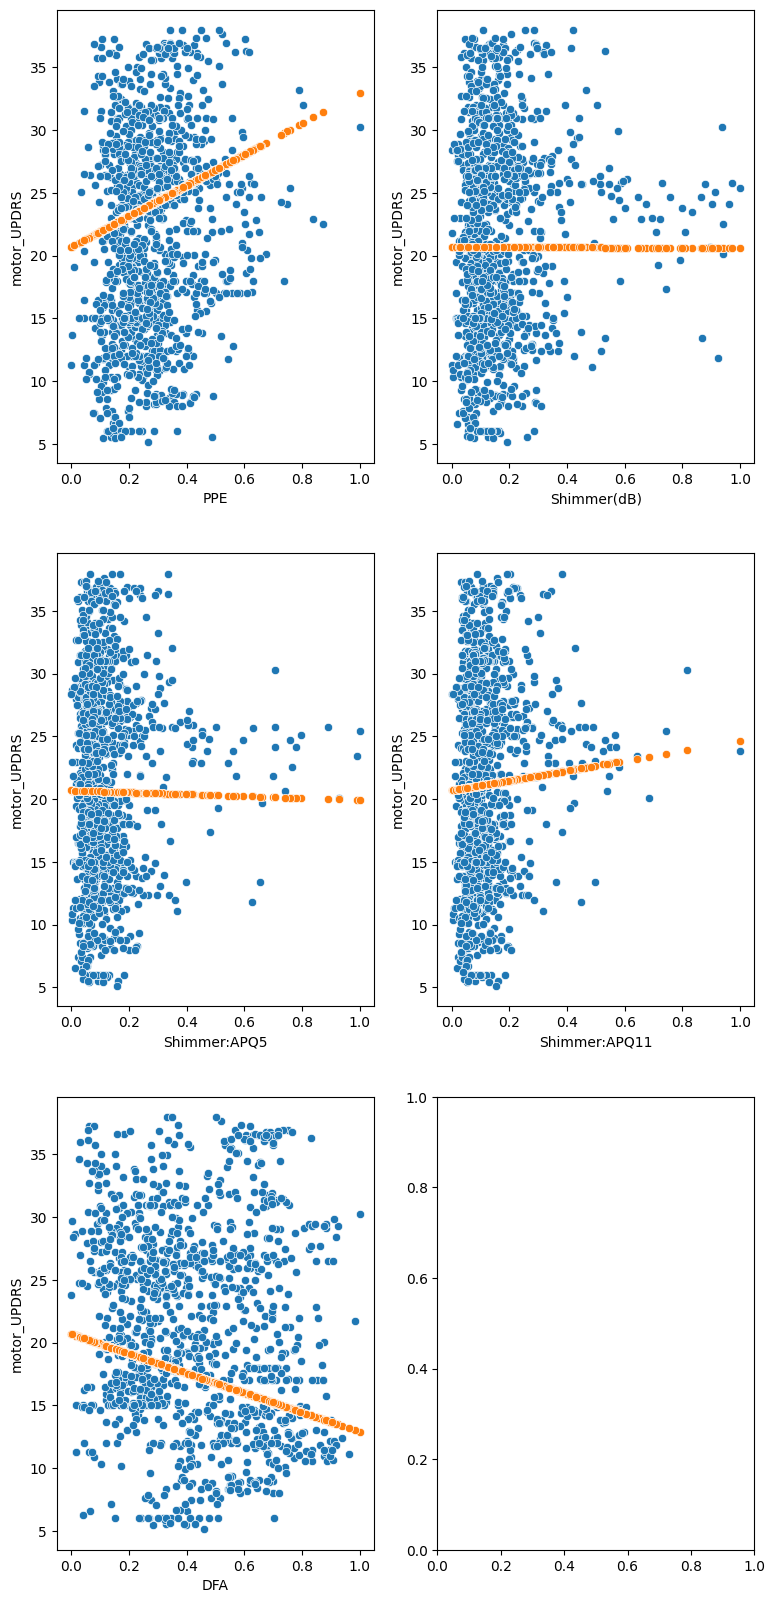

In [58]:
F_scaled_model = Linear_Regression(train_scaled, train_set_10F_y, test_scaled, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(F_scaled_model)

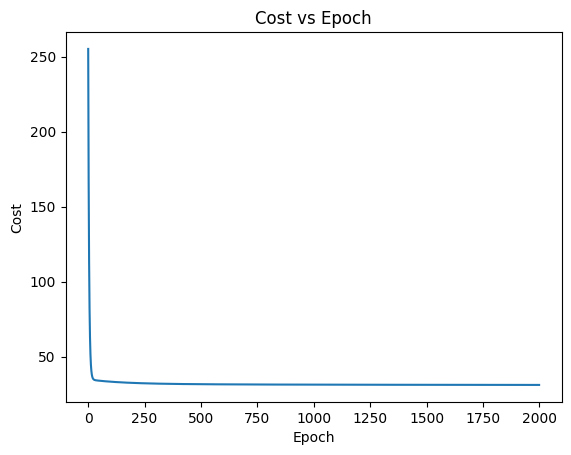

MSE for all 5 features
59.209746291406541264


In [59]:
cost_log = F_scaled_model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(F_scaled_model.MSE())